# Applications of Python: Intro to Machine Learning

## Hello World of Machine Learning: The Iris Dataset
1. Read in the iris dataset.
2. Print out the dataset's keys so we know what info we have access to.
3. Plot two features of the iris flowers.

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


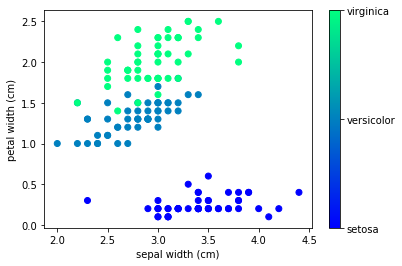

In [4]:
"""
Part 1: HelloWorldML. Reading the Iris Dataset.
"""
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the iris dataset
iris = load_iris()

# Print out the dataset keys, so we know what info we have access to
print(iris.keys())

# Plot two features of the iris flowers
feat1_idx = 1
feat2_idx = 3

plt.scatter(iris.data[:, feat1_idx], iris.data[:, feat2_idx], 
            c=iris.target, cmap=plt.cm.get_cmap('winter'))
def fmt(i, *args):
    return iris.target_names[int(i)]
plt.colorbar(ticks=[0, 1, 2], format=plt.FuncFormatter(fmt))
plt.xlabel(iris.feature_names[feat1_idx])
plt.ylabel(iris.feature_names[feat2_idx])
plt.show()

## Supervised Learning: k-NN Classification.
1. Read in the iris dataset.
2. Train a kNN classifier model.
3. Predict a flower.
4. Plot the kNN classifier boundaries.

['virginica']


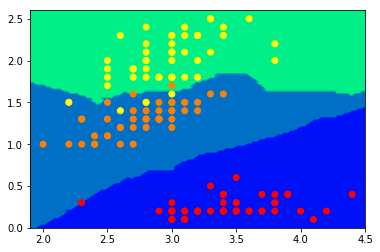

In [39]:
"""
Part 2: Supervised Learning. k-Nearest-Neighbor (k-NN) classification.
"""
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt 
import plotfuncs as pf

# Load the iris set
iris = load_iris()
data, labels = iris.data, iris.target

# Train a model using kNN using some k.
kNN = KNeighborsClassifier(n_neighbors=5)
kNN.fit(data, labels)

# Predict a flower.
result = kNN.predict([[2, 2, 5, 3],])
print(iris.target_names[result])

# Plot the classifier boundaries (use the best 2 features)
feat1_idx = 1
feat2_idx = 3
data = data[:, (feat1_idx, feat2_idx)]
kNN.fit(data, labels)

xx, yy = pf.make_meshgrid(data[:, 0], data[:, 1], 100)
pf.plot_contours(plt, kNN, xx, yy, cmap=plt.cm.get_cmap('winter')) 
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap=plt.cm.get_cmap('autumn'))
plt.show()

## Supervised Learning: Support Vector Classifiers / Machines
1. Make blobs (already done).
2. Train a linear SVC model.
3. Plot the decision boundaries (with the support vectors).

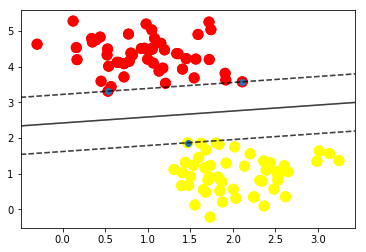

In [6]:
"""
Part 3: Support Vector Classifiers / Machines.
"""
from sklearn.datasets.samples_generator import make_blobs

# Generate random set
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.5)

# Learn a linear SVC
from sklearn.svm import SVC
clf = SVC(kernel='linear')
clf.fit(X, y)

# Plot the same as the above, but with the support vectors
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='autumn');
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1])
pf.plot_svc_decision_function(clf)
plt.show()


## Supervised Learning: Kernel SVC/SVM
1. Make blobs (already done).
2. Train a linear SVC model.
3. Plot the decision boundaries.
4. Train an RBF kernel SVC model.
5. Plot the decision boundaries.

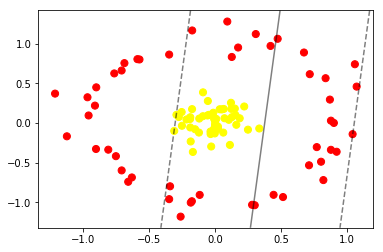

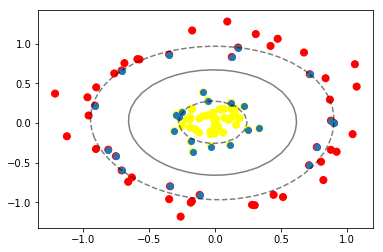

In [7]:
"""
Part 3 (cont.): SVC (kernel methods)
"""
from sklearn.datasets.samples_generator import make_circles

X, y = make_circles(100, factor=.1, noise=.1)

# Learn a linear SVC
clf = SVC(kernel='linear').fit(X, y)

# Plot the dataset on a scatter plot
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
# Show the SVC decision boundaries
pf.plot_svc_decision_function(clf);
plt.show()

# Learn a SVC with RBF kernel
clf = SVC(kernel='rbf')
clf.fit(X, y)

# Plot the dataset on a scatter plot
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
# Show the SVC decision boundaries, with support vectors
pf.plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1])
plt.show()


## Supervised Learning: SVC/SVM Exercises.
1. Load the Iris dataset, only plotting setosa and versicolor using the sepal width and petal width features.
2. Train a linear SVC model and plot the decision boundaries.
3. Load all Iris dataset, again only using the sepal width and petal width features.
4. Train a linear SVC model, and plot the decision boundaries (use make_meshgrid and plot_contours).
5. Load the MNIST handwritten digit dataset, and train a linear SVC model. Plot some of the misclassified test set digits. What do you notice?

In [8]:
"""
Part 3 Exercises.
"""
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import plotfuncs as pf

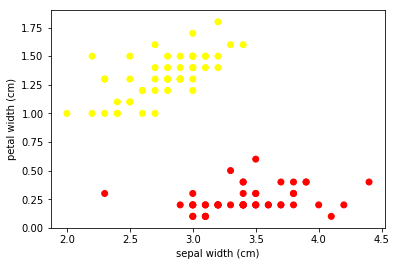

In [9]:
# Exercise 1: Load Iris set. Only plot setosa and versicolor.
iris = load_iris()
data, labels = iris.data[:100], iris.target[:100]
data = data[:, (1, 3)]
    
# Plot with sepal width / petal width
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='autumn');
plt.xlabel(iris.feature_names[1])
plt.ylabel(iris.feature_names[3])
plt.show()

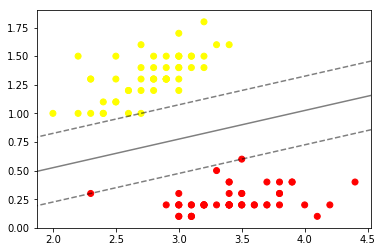

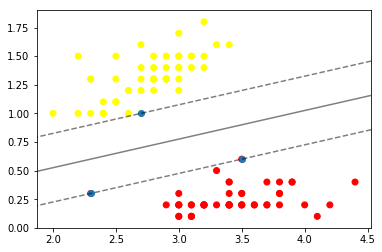

In [10]:
# Exercise 2 - Support Vector Classifier
from sklearn.svm import SVC
clf = SVC(kernel='linear', C=10)
clf.fit(data, labels)

# Plot SVC decision
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='autumn');
pf.plot_svc_decision_function(clf)
plt.show()

# Plot support vectors
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='autumn');
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1])
pf.plot_svc_decision_function(clf)
plt.show()

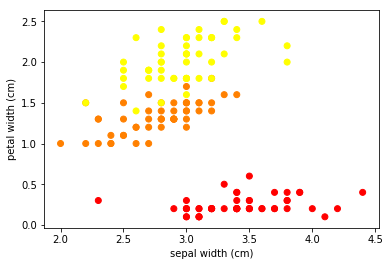

In [11]:
# Exercise 3 - plot entire dataset, using sepal & petal width
data, labels = iris.data, iris.target
data = data[:, (1, 3)]

# Plot with sepal width / petal width
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='autumn');
plt.xlabel(iris.feature_names[1])
plt.ylabel(iris.feature_names[3])
plt.show()

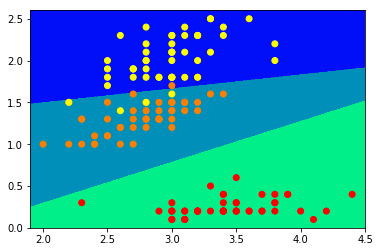

In [12]:
# Exercise 4 - Support Vector Classifier
clf = SVC(kernel='linear')
clf.fit(data, labels)

# Plot SVC decision
xx, yy = pf.make_meshgrid(data[:, 0], data[:, 1], h=500)
pf.plot_contours(plt, clf, xx, yy, cmap='winter_r')
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='autumn');
plt.show()

Loading training set...
Loading test set...
Generating LinearSVC Model...
Done.


In [ ]:
# Exercise 5: Use SVC to predict the MNIST test set, and visualize the errors.
# http://yann.lecun.com/exdb/mnist/
import numpy as np
from sklearn import svm
import pickle
import os.path
import sys

if not os.path.isfile('training_set_images.npy'):
    print("Warning: Could not find NPY files of the MNIST data set.")
    print("Running loader.py.")
    import loader

print('Loading training set...')
train_x = np.load('training_set_images.npy')
train_y = np.load('training_set_labels.npy').ravel()

print('Loading test set...')
test_x = np.load('test_set_images.npy')
test_y = np.load('test_set_labels.npy').ravel()

print('Generating LinearSVC Model...')
C_val = 5.0
if not os.path.isfile('MNIST_linearSVC_' + str(C_val) + '.sav'):
    model = svm.LinearSVC(loss='hinge', C=C_val)
    model.fit(train_x, train_y)
    pickle.dump(model, open('MNIST_linearSVC_' + str(C_val) + '.sav', 'wb'))

print('Done.')
model = pickle.load(open('MNIST_linearSVC_' + str(C_val) + '.sav', 'rb'))

print('Calculating training error:')
predict_values = model.predict(train_x).reshape(len(train_y))
error = np.mean(predict_values != train_y)
print("Training error for LinearSVC, C=", C_val, ": ", error)

print('Calculating test error:')
predict_values = model.predict(test_x).reshape(len(test_y))
error = np.mean(predict_values != test_y)
print("Test error for LinearSVC, C=", C_val, ": ", error)

# Pick out 5 random ones to show
num_to_show = 5
inds = np.random.choice((np.where(predict_values != test_y))[0], num_to_show)

import matplotlib.pyplot as plt
for i in range(0, num_to_show):
    plt.imshow(test_x[inds[i],].reshape((28, 28)), cmap=plt.cm.gray)
    plt.show()
    print('Predicted: ', predict_values[inds[i]])
    print('Actual: ', test_y[inds[i]])

Loading training set...
Loading test set...
Generating LinearSVC Model...
